# Preparatory steps: Understand the structure of datasets
#### Import of libraries and datasets
#### Understand the data structures of the datasets

In [2]:
#Import both pandas and numpy, as well as libraries for visualization (seaborn & matplotlib)
import numpy as np
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt  
sns.set(color_codes=True) # adding better background to graphs
%matplotlib inline 
# instructs Python display the graphs

In [3]:
#Load the Cardio Good Fitness dataset and give the dataset a variable
cardio = pd.read_csv("CardioGoodFitness.csv")

In [4]:
#Return the top 5 rows of the dataset to see how it looks like
cardio.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [29]:
#Check the dimension of the data
cardio.shape

(180, 9)

In [30]:
# To see the data type of each of the variable, number of values entered in each of the variables
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
Product          180 non-null object
Age              180 non-null int64
Gender           180 non-null object
Education        180 non-null int64
MaritalStatus    180 non-null object
Usage            180 non-null int64
Fitness          180 non-null int64
Income           180 non-null int64
Miles            180 non-null int64
dtypes: int64(6), object(3)
memory usage: 12.7+ KB


In [31]:
#Check if there is any missing data, to further support the info() instruction above
cardio.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [100]:
# To provide a glimpse on the basic statistics of the quantitative data in the datasets
cardio.describe().round(1)

,Age,Education,Usage,Fitness,Income,Miles
count,180.0,180.0,180.0,180.0,180.0,180.0
mean,28.8,15.6,3.5,3.3,53719.6,103.2
std,6.9,1.6,1.1,1.0,16506.7,51.9
min,18.0,12.0,2.0,1.0,29562.0,21.0
25%,24.0,14.0,3.0,3.0,44058.8,66.0
50%,26.0,16.0,3.0,3.0,50596.5,94.0
75%,33.0,16.0,4.0,4.0,58668.0,114.8
max,50.0,21.0,7.0,5.0,104581.0,360.0


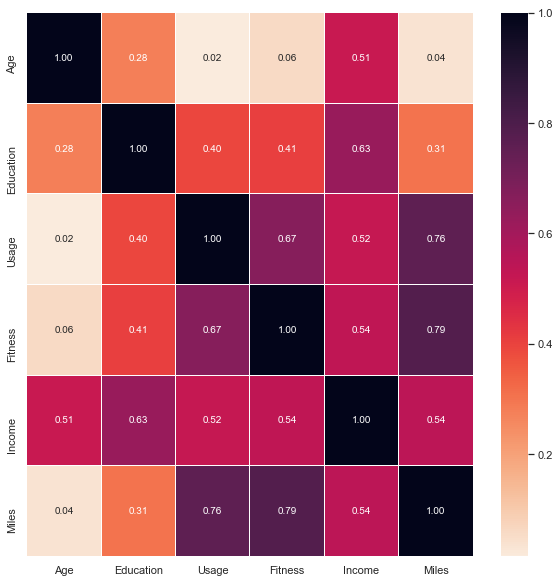

In [97]:
# get a rough estimation of the strength and direction of correlation 
# of quantitative data
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(cardio.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="rocket_r")  
plt.show()

In [21]:
#Find out in which the direction the dataset skews to
cardio.skew() 

Age          0.982161
Education    0.622294
Usage        0.739494
Fitness      0.454800
Income       1.291785
Miles        1.724497
dtype: float64

In [5]:
age_group = pd.cut(cardio['Age'], bins=[18, 25, 35, 51])
age_group
#Creates three age groups: (18, 25], (25, 35], (35, 51] 
#Name: Age, dtype: category
#Categories (3, object): [(18, 25] < (25, 35] < (35, 51]]

0           NaN
1      (18, 25]
2      (18, 25]
3      (18, 25]
4      (18, 25]
5      (18, 25]
6      (18, 25]
7      (18, 25]
8      (18, 25]
9      (18, 25]
10     (18, 25]
11     (18, 25]
12     (18, 25]
13     (18, 25]
14     (18, 25]
15     (18, 25]
16     (18, 25]
17     (18, 25]
18     (18, 25]
19     (18, 25]
20     (18, 25]
21     (18, 25]
22     (18, 25]
23     (18, 25]
24     (18, 25]
25     (18, 25]
26     (18, 25]
27     (18, 25]
28     (18, 25]
29     (18, 25]
         ...   
150    (18, 25]
151    (18, 25]
152    (18, 25]
153    (18, 25]
154    (18, 25]
155    (18, 25]
156    (18, 25]
157    (25, 35]
158    (25, 35]
159    (25, 35]
160    (25, 35]
161    (25, 35]
162    (25, 35]
163    (25, 35]
164    (25, 35]
165    (25, 35]
166    (25, 35]
167    (25, 35]
168    (25, 35]
169    (25, 35]
170    (25, 35]
171    (25, 35]
172    (25, 35]
173    (25, 35]
174    (35, 51]
175    (35, 51]
176    (35, 51]
177    (35, 51]
178    (35, 51]
179    (35, 51]
Name: Age, Length: 180, 

In [10]:
#Gender distribution by age group
pd.crosstab(age_group, cardio['Gender']).apply(lambda c: c/c.sum(), axis=1).round(2)

Gender,Female,Male
Age,,
"(18, 25]",0.41,0.59
"(25, 35]",0.48,0.52
"(35, 51]",0.32,0.68


In [11]:
#Marital status distribution by age group
pd.crosstab(age_group, cardio['MaritalStatus']).apply(lambda c: c/c.sum(), axis=1).round(2)

MaritalStatus,Partnered,Single
Age,,
"(18, 25]",0.51,0.49
"(25, 35]",0.63,0.37
"(35, 51]",0.75,0.25


Text(0.5, 1.0, 'Average income level by age & gender')

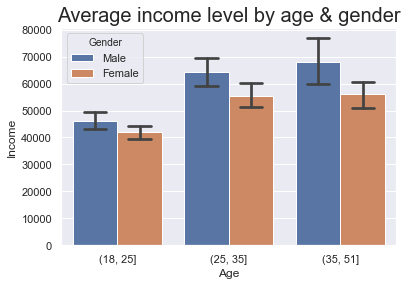

In [11]:
#Find out the income level of each age and gender
income_byagegender = sns.barplot(age_group, cardio['Income'], hue=cardio['Gender'], capsize=.2).set_title('Average income level by age & gender', fontsize=20)
income_byagegender

Text(0.5, 1.0, 'Average education level by age & gender')

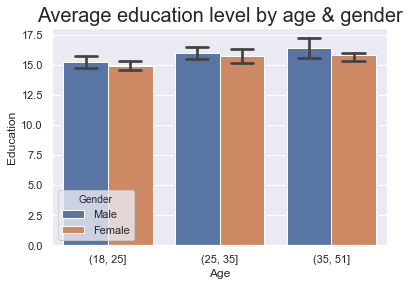

In [10]:
#Examine education level by age and gender
edu_byagegender = sns.barplot(age_group, cardio['Education'], hue=cardio['Gender'], capsize=.2).set_title('Average education level by age & gender',fontsize = 20)
edu_byagegender

Text(0.5, 1.0, 'Average fitness rating by age & gender')

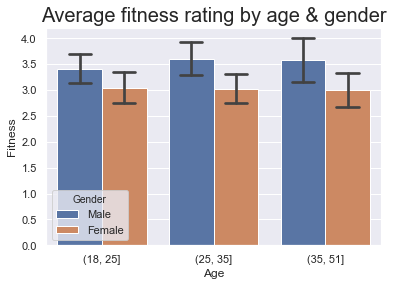

In [13]:
#Examine perceived fitness level by age and gender
fit_byagegender = sns.barplot(age_group, cardio['Fitness'], hue=cardio['Gender'], capsize=.2).set_title('Average fitness rating by age & gender', fontsize=20)
fit_byagegender

Text(0.5, 1.0, 'Average income level by marital status & gender')

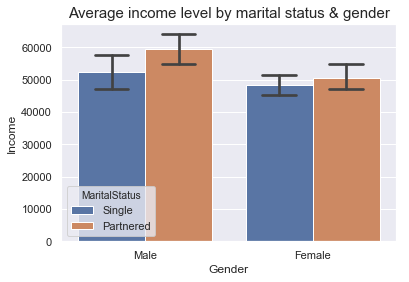

In [14]:
#Investigate income level by marital status and gender
sns.barplot(cardio['Gender'], cardio['Income'], hue=cardio['MaritalStatus'], capsize=.2).set_title('Average income level by marital status & gender', fontsize=15)

Text(0.5, 1.0, 'Average education level by marital status & gender')

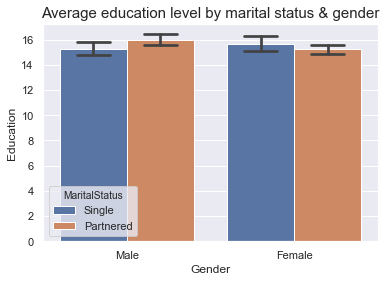

In [13]:
#Identify education level by marital status and gender
sns.barplot(cardio['Gender'], cardio['Education'], hue=cardio['MaritalStatus'], capsize=.2).set_title('Average education level by marital status & gender', fontsize=15)

Text(0.5, 1.0, 'Average fitness rating by marital status & gender')

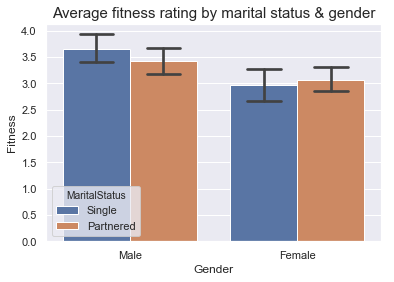

In [15]:
#Identify fitness perception by marital status and gender
sns.barplot(cardio['Gender'], cardio['Fitness'], hue=cardio['MaritalStatus'], capsize=.2).set_title('Average fitness rating by marital status & gender', fontsize=15)

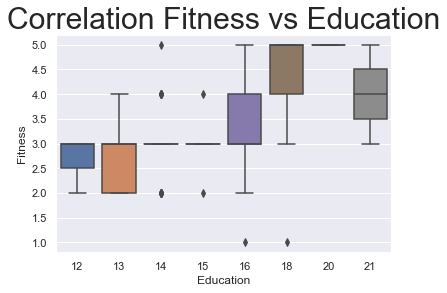

In [14]:
#Find out the relationship between education level and fitness rating
sns.boxplot(cardio['Education'], cardio['Fitness']).set_title('Correlation Fitness vs Education', fontsize=30)
plt.show()

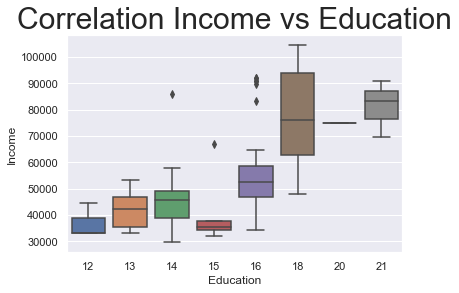

In [15]:
#Find out the relationship between education level and income level
sns.boxplot(cardio['Education'], cardio['Income']).set_title('Correlation Income vs Education', fontsize=30)
plt.show()

Text(0.5, 1.0, 'Average miles expected to run')

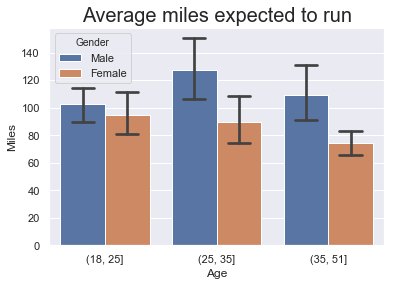

In [18]:
#Look into the average miles expected to run by each gender and age
miles_byagegender = sns.barplot(age_group, cardio['Miles'], hue=cardio['Gender'], capsize=.2).set_title('Average miles expected to run', fontsize=20)
miles_byagegender

Text(0.5, 1.0, 'Usage consideration of treadmill/week')

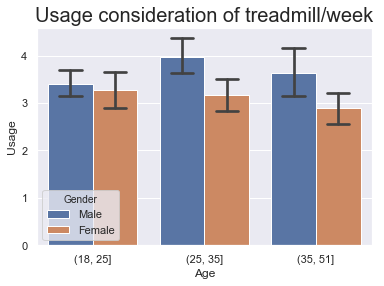

In [19]:
#Look into the average times a user would consider to use a treadmill by gender and age
usage_byagegender = sns.barplot(age_group, cardio['Usage'], hue=cardio['Gender'], capsize=.2).set_title('Usage consideration of treadmill/week', fontsize=20)
usage_byagegender

Text(0.5, 1.0, 'Average miles expected to run')

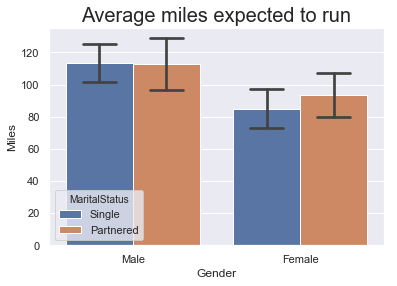

In [19]:
#Look into the average miles expected to run by each gender and marital status
sns.barplot(cardio['Gender'], cardio['Miles'], hue=cardio['MaritalStatus'], capsize=.2).set_title('Average miles expected to run', fontsize=20)

Text(0.5, 1.0, 'Usage consideration of treadmill/week')

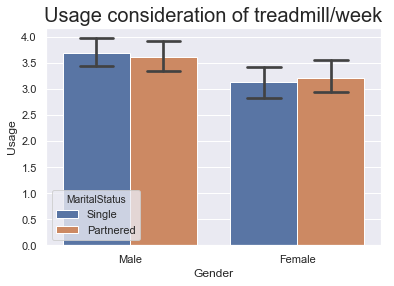

In [17]:
#Look into the number of time one considers to use the treadmill by each gender and marital status
sns.barplot(cardio['Gender'], cardio['Usage'], hue=cardio['MaritalStatus'], capsize=.2).set_title('Usage consideration of treadmill/week', fontsize=20)

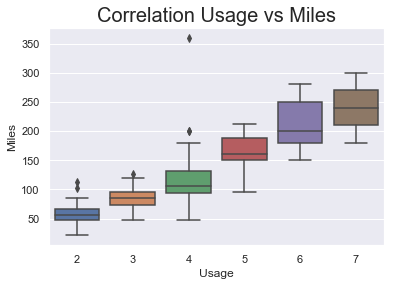

In [31]:
#Look into the number of time one considers to use the treadmill a week by each gender and marital status
sns.boxplot(cardio['Usage'], cardio['Miles']).set_title('Correlation Usage vs Miles', fontsize=20)
plt.show()

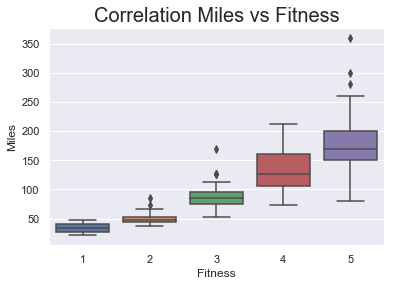

In [34]:
#Find out the relationship between average miles run a week and fitness rating
sns.boxplot(cardio['Fitness'], cardio['Miles']).set_title('Correlation Miles vs Fitness', fontsize=20)
plt.show()

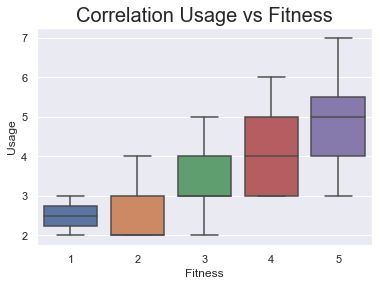

In [36]:
#Find out the relationship between average times one considers to use a treadmill and fitness rating
sns.boxplot(cardio['Fitness'], cardio['Usage']).set_title('Correlation Usage vs Fitness', fontsize=20)
plt.show()

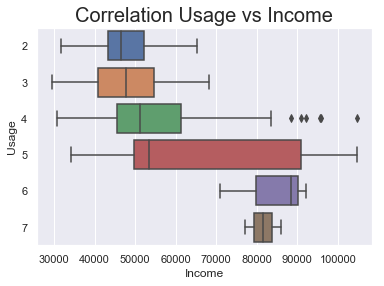

In [25]:
#Identify relationship between income level and number of time one considers to use the treadmill
sns.boxplot(cardio['Income'], cardio['Usage'], orient = "h").set_title('Correlation Usage vs Income', fontsize=20)
plt.show()

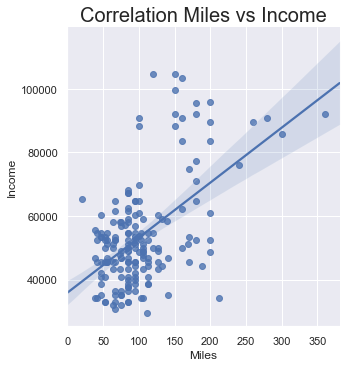

In [13]:
#Identify correlation between income level and miles expected to run per week
sns.lmplot(x = "Miles",y = "Income", data = cardio)
plt.title ('Correlation Miles vs Income', fontsize=20)
plt.show()

# Identify Product Positioning of Each Treadmill Model

#### For buyers of each model, we depict the buyers' profile using the miles run per week, fitness rating, average times the buyers use the treadmill per week and their income level

#### We also find out the buyer's demographic profiles for each model

Text(0.5, 1.0, 'Miles to be run on each model')

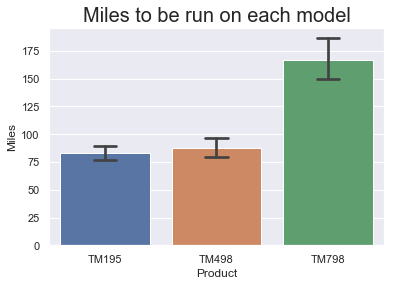

In [21]:
# Average miles run by buyers of each model
sns.barplot(cardio['Product'], cardio['Miles'], capsize=.2).set_title('Miles to be run on each model', fontsize=20)

Text(0.5, 1.0, 'Fitness rating among users of each model')

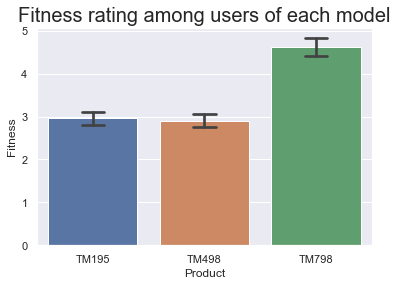

In [20]:
# Perceived fitness level of buyers of each model
sns.barplot(cardio['Product'], cardio['Fitness'], capsize=.2).set_title('Fitness rating among users of each model', fontsize=20)

Text(0.5, 1.0, 'Usage consideration for each model')

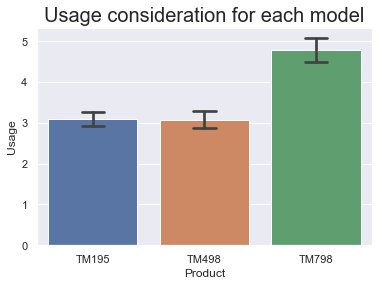

In [19]:
# Average number of times the buyers of each model would consider to use the treadmill a week
sns.barplot(cardio['Product'], cardio['Usage'], capsize=.2).set_title('Usage consideration for each model', fontsize=20)

Text(0.5, 1.0, "Buyers' income of each model")

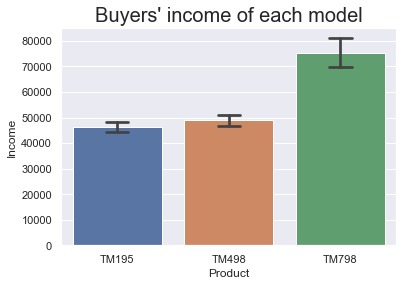

In [24]:
# Income levels of buyers of each model
sns.barplot(cardio['Product'], cardio['Income'], capsize=.2).set_title("Buyers' income of each model", fontsize=20)

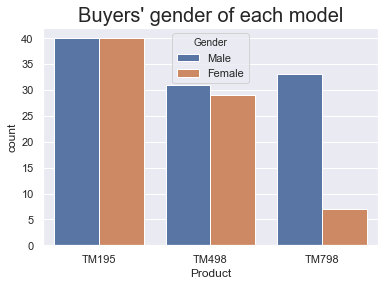

In [33]:
# Identify the gender distribution of buyers of each model
sns.countplot(cardio['Product'], hue = cardio['Gender']).set_title("Buyers' gender of each model", fontsize=20)
plt.show()

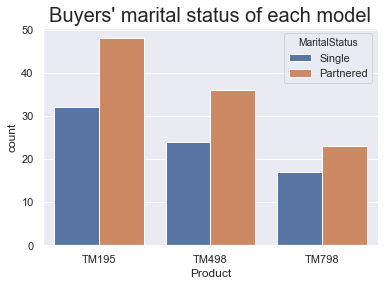

In [34]:
# Examine whether a particular model appeals to group with different marital status
sns.countplot(cardio['Product'], hue = cardio['MaritalStatus']).set_title("Buyers' marital status of each model", fontsize=20)
plt.show()

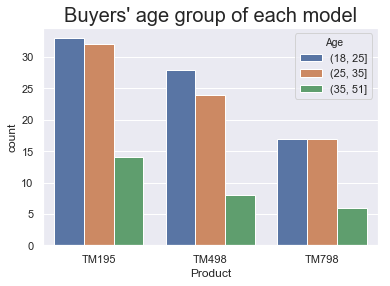

In [37]:
# Find out if certain age group has a preferred model
sns.countplot(cardio['Product'], hue = age_group).set_title("Buyers' age group of each model", fontsize=20)
plt.show()